In [1]:
%load_ext tikzmagic
%matplotlib inline

# 스케일링과 다중공선성

In [2]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
formula_scaled = "medv ~ scale(tax) + scale(nox)"
result_scaled = sm.OLS.from_formula(formula_scaled, boston).fit()
print(result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     80.79
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.75e-31
Time:                        13:39:19   Log-Likelihood:                -1769.8
No. Observations:                 506   AIC:                             3546.
Df Residuals:                     503   BIC:                             3558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.356     63.222      0.0

In [4]:
formula_notscaled = "medv ~ tax + nox"
result_notscaled = sm.OLS.from_formula(formula_notscaled, boston).fit()
print(result_notscaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     80.79
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.75e-31
Time:                        13:39:19   Log-Likelihood:                -1769.8
No. Observations:                 506   AIC:                             3546.
Df Residuals:                     503   BIC:                             3558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9878      1.784     21.857      0.0

In [5]:
from numpy.random import seed, rand

boston_noise = boston.copy()
seed(0)
boston_noise["tax"] += boston_noise["tax"] * np.random.rand(len(boston)) * 0.01
boston_noise["nox"] += boston_noise["nox"] * np.random.rand(len(boston)) * 0.01

pd.concat([boston, boston_noise], axis=1, keys=["원본", "노이즈"])

원본                                                         ...  \
        crim    zn  indus chas    nox     rm   age     dis rad  tax  ...   
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296  ...   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242  ...   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242  ...   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222  ...   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222  ...   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..  ...  ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273  ...   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273  ...   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273  ...   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273  ...   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273  ...   

          노이즈                                                                   
          nox     rm   age     dis rad         tax ptratio   black lstat  medv  
0    0.542639  6.575  65.2  4.0900   1  297.624488    15.3  396.90  4.98  24.0  
1    0.469228  6.421  78.9  4.9671   2  243.730758    17.8  396.90  9.14  21.6  
2    0.470190  7.185  61.1  4.9671   2  243.458687    17.8  392.83  4.03  34.7  
3    0.460043  6.998  45.8  6.0622   3  223.209641    18.7  394.63  2.94  33.4  
4    0.458479  7.147  54.2  6.0622   3  222.940514    18.7  396.90  5.33  36.2  
..        ...    ...   ...     ...  ..         ...     ...     ...   ...   ...  
501  0.573176  6.593  69.1  2.4786   1  274.018385    21.0  391.99  9.67  22.4  
502  0.574286  6.120  76.7  2.2875   1  274.433169    21.0  396.90  9.08  20.6  
503  0.578465  6.976  91.0  2.1675   1  275.049124    21.0  396.90  5.64  23.9  
504  0.576337  6.794  89.3  2.3889   1  273.910475    21.0  393.45  6.48  22.0  
505  0.573616  6.030  80.8  2.5050   1  275.522953    21.0  396.90  7.88  11.9  

[506 rows x 28 columns]

In [6]:
result_scaled_noise = sm.OLS.from_formula(formula_scaled, boston_noise).fit()
print(result_scaled_noise.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     80.81
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.69e-31
Time:                        13:39:19   Log-Likelihood:                -1769.7
No. Observations:                 506   AIC:                             3545.
Df Residuals:                     503   BIC:                             3558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.356     63.224      0.0

In [7]:
result_notscaled_noise = sm.OLS.from_formula(formula_notscaled, boston_noise).fit()
print(result_notscaled_noise.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     80.81
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.69e-31
Time:                        13:39:19   Log-Likelihood:                -1769.7
No. Observations:                 506   AIC:                             3545.
Df Residuals:                     503   BIC:                             3558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9846      1.784     21.856      0.0

In [8]:
error_scaled = (result_scaled.params - result_scaled_noise.params) / result_scaled.params * 100
pd.concat([result_scaled.params, result_scaled_noise.params, error_scaled], 
          axis=1, keys=["원본 데이터", "노이즈 데이터", "변화"])

,원본 데이터,노이즈 데이터,변화
Intercept,22.532806,22.532806,0.000000
scale(tax),-3.037683,-3.036102,0.052051
scale(nox),-1.896985,-1.898227,-0.065452


In [9]:
error_notscaled = (result_notscaled.params - result_notscaled_noise.params) / result_notscaled.params * 100
pd.concat([result_notscaled.params, result_notscaled_noise.params, error_notscaled], 
          axis=1, keys=["원본 데이터", "노이즈 데이터", "변화"])

,원본 데이터,노이즈 데이터,변화
Intercept,38.987751,38.984622,0.008025
tax,-0.018042,-0.017935,0.590006
nox,-16.386784,-16.312490,0.453375


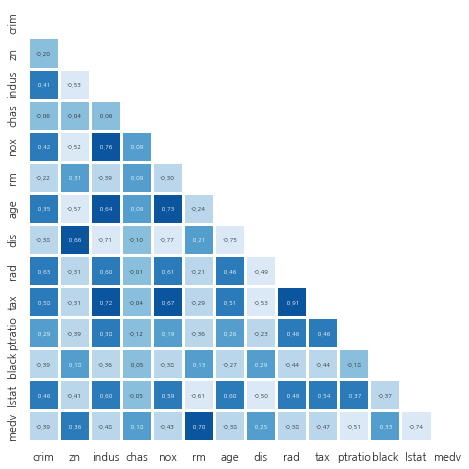

In [10]:
corr = boston.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask=np.triu(corr), square=True, linewidths=3, 
            annot=True, fmt="5.2f", annot_kws={"fontsize": 6},
            cmap=sns.color_palette("Blues"), cbar=False)
plt.show()